<a href="https://colab.research.google.com/github/ViniciusCastillo/Aprendendo/blob/master/Modulo6_Aula2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
import pandas as pd
import numpy as np
import seaborn as sb

In [4]:
df_clientes_cadastrados = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/Avaliacao_Credito/main/dados/clientes_cadastrados.csv')
df_clientes_cadastrados.shape

(438557, 18)

In [5]:
df_clientes_cadastrados['ID_Cliente'].value_counts()

7137299    2
7702238    2
7282535    2
7243768    2
7050948    2
          ..
5690727    1
6621262    1
6621261    1
6621260    1
6842885    1
Name: ID_Cliente, Length: 438510, dtype: int64

In [6]:
df_clientes_cadastrados.duplicated().sum()

0

In [7]:
df_clientes_cadastrados[df_clientes_cadastrados['ID_Cliente'].duplicated(keep=False)].shape

(94, 18)

In [8]:
id_repetidos = df_clientes_cadastrados[df_clientes_cadastrados['ID_Cliente'].duplicated(keep=False)]['ID_Cliente']
id_repetidos

421211    7702516
421268    7602432
421349    7602432
421464    7836971
421698    7213374
           ...   
433158    7282535
433159    7742853
433217    7135270
433666    7091721
433789    7618285
Name: ID_Cliente, Length: 94, dtype: int64

In [10]:
df_clientes_cadastrados_ID_unicos = df_clientes_cadastrados.drop(id_repetidos.index)

In [11]:
df_clientes_cadastrados_ID_unicos['ID_Cliente'].value_counts()

5008804    1
6147691    1
6147689    1
6147688    1
6147685    1
          ..
6093492    1
5690720    1
6538938    1
6538937    1
6842885    1
Name: ID_Cliente, Length: 438463, dtype: int64

In [12]:
df_clientes_cadastrados_ID_unicos.isnull().sum()

ID_Cliente               0
Genero                   0
Tem_Carro                0
Tem_Casa_Propria         0
Qtd_Filhos               0
Rendimento_Anual         0
Categoria_de_renda       0
Grau_Escolaridade        0
Estado_Civil             0
Moradia                  0
Idade                    0
Tem_Celular              0
Tem_telefone_trabalho    0
Tem_telefone_fixo        0
Tem_email                0
Ocupacao                 0
Tamanho_Familia          0
Anos_empregado           0
dtype: int64

In [13]:
df_clientes_cadastrados_ID_unicos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438463 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID_Cliente             438463 non-null  int64  
 1   Genero                 438463 non-null  object 
 2   Tem_Carro              438463 non-null  int64  
 3   Tem_Casa_Propria       438463 non-null  int64  
 4   Qtd_Filhos             438463 non-null  int64  
 5   Rendimento_Anual       438463 non-null  float64
 6   Categoria_de_renda     438463 non-null  object 
 7   Grau_Escolaridade      438463 non-null  object 
 8   Estado_Civil           438463 non-null  object 
 9   Moradia                438463 non-null  object 
 10  Idade                  438463 non-null  float64
 11  Tem_Celular            438463 non-null  int64  
 12  Tem_telefone_trabalho  438463 non-null  int64  
 13  Tem_telefone_fixo      438463 non-null  int64  
 14  Tem_email              438463 non-nu

Desafios

Desafio 1: Explorar IDs repetidos (Atualização de cadastro ? Erro ?)

Desafio 2: Explorar as colunas (features) identificar continuas, categoricas e binarias

In [14]:
a = df_clientes_cadastrados[df_clientes_cadastrados.ID_Cliente.duplicated(keep=False)].sort_values('ID_Cliente')
a.head(8)

,ID_Cliente,Genero,Tem_Carro,Tem_Casa_Propria,Qtd_Filhos,Rendimento_Anual,Categoria_de_renda,Grau_Escolaridade,Estado_Civil,Moradia,Idade,Tem_Celular,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Ocupacao,Tamanho_Familia,Anos_empregado
426818,7022197,H,1,1,3,135000.0,Empregado,Ensino medio,Casado,Casa propria,33.0,1,0,0,1,Construcao Civil,5.0,2.0
425023,7022197,M,0,1,0,450000.0,Associado comercial,Ensino superior,Separado,Casa propria,54.0,1,0,0,1,Outros,1.0,4.9
431545,7022327,M,0,1,0,135000.0,Associado comercial,Ensino medio,Solteiro,Casa propria,40.0,1,0,0,0,Alta tecnologia,1.0,14.5
431911,7022327,H,1,1,0,256500.0,Associado comercial,Ensino superior,Casado,Casa propria,59.0,1,0,0,1,Equipe principal,2.0,4.6
425486,7023108,H,1,1,1,67500.0,Empregado,Ensino medio,Casado,Casa propria,42.0,1,1,0,0,Equipe principal,3.0,4.6
426488,7023108,M,0,0,0,135000.0,Empregado,Ensino medio,Casado,Casa propria,48.0,1,0,0,0,Limpeza,2.0,3.5
425306,7023651,M,0,0,0,225000.0,Associado comercial,Ensino superior incompleto,Solteiro,Casa propria,28.0,1,0,0,0,Contabilidade,1.0,3.3
421907,7023651,H,1,0,1,157500.0,Associado comercial,Ensino superior incompleto,Casado,Casa propria,29.0,1,0,0,0,Motorista,3.0,4.0


In [15]:
a.tail(8)

,ID_Cliente,Genero,Tem_Carro,Tem_Casa_Propria,Qtd_Filhos,Rendimento_Anual,Categoria_de_renda,Grau_Escolaridade,Estado_Civil,Moradia,Idade,Tem_Celular,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Ocupacao,Tamanho_Familia,Anos_empregado
429228,7833087,M,0,1,0,90000.0,Pensionista,Ensino medio,Viuvo,Casa propria,60.0,1,0,0,0,Outros,1.0,-1000.7
430284,7833087,H,0,1,0,157500.0,Associado comercial,Ensino medio,Casado,Casa propria,44.0,1,0,0,0,Construcao Civil,2.0,6.1
426714,7836711,H,1,0,2,315000.0,Servidor publico,Ensino superior,Casado,Casa propria,32.0,1,1,1,0,Gerencia,4.0,4.2
426563,7836711,M,0,1,2,292500.0,Empregado,Ensino superior,Casado,Casa propria,38.0,1,0,1,0,Contabilidade,4.0,12.0
421464,7836971,H,1,0,1,157500.0,Empregado,Ensino medio,Casado,Casa propria,38.0,1,0,0,0,Outros,3.0,15.1
428620,7836971,M,0,1,0,103500.0,Empregado,Ensino medio,Uniao estavel,Casa propria,37.0,1,0,1,0,Venda,2.0,7.7
422068,7838075,H,0,1,0,337500.0,Associado comercial,Ensino medio,Casado,Casa propria,50.0,1,0,0,1,Motorista,2.0,3.5
423702,7838075,M,1,1,0,315000.0,Associado comercial,Ensino superior,Solteiro,Casa propria,29.0,1,0,0,1,Outros,1.0,4.5


In [16]:
df_clientes_cadastrados_ID_unicos.describe(include='all')

,ID_Cliente,Genero,Tem_Carro,Tem_Casa_Propria,Qtd_Filhos,Rendimento_Anual,Categoria_de_renda,Grau_Escolaridade,Estado_Civil,Moradia,Idade,Tem_Celular,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Ocupacao,Tamanho_Familia,Anos_empregado
count,4.384630e+05,438463,438463.000000,438463.000000,438463.000000,4.384630e+05,438463,438463,438463,438463,438463.000000,438463.0,438463.000000,438463.000000,438463.000000,438463,438463.000000,438463.000000
unique,NaN,2,NaN,NaN,NaN,NaN,5,5,5,6,NaN,NaN,NaN,NaN,NaN,19,NaN,NaN
top,NaN,M,NaN,NaN,NaN,NaN,Empregado,Ensino medio,Casado,Casa propria,NaN,NaN,NaN,NaN,NaN,Outros,NaN,NaN
freq,NaN,294378,NaN,NaN,NaN,NaN,226059,301756,299768,393748,NaN,NaN,NaN,NaN,NaN,134177,NaN,NaN
mean,6.021894e+06,NaN,0.371906,0.693352,0.427384,1.875220e+05,NaN,NaN,NaN,NaN,43.834032,1.0,0.206129,0.287762,0.108196,NaN,2.194461,-165.936036
std,5.713554e+05,NaN,0.483314,0.461103,0.724879,1.100832e+05,NaN,NaN,NaN,NaN,11.472815,0.0,0.404525,0.452720,0.310628,NaN,0.897194,380.201131
min,5.008804e+06,NaN,0.000000,0.000000,0.000000,2.610000e+04,NaN,NaN,NaN,NaN,21.000000,1.0,0.000000,0.000000,0.000000,NaN,1.000000,-1000.700000
25%,5.609340e+06,NaN,0.000000,0.000000,0.000000,1.215000e+05,NaN,NaN,NaN,NaN,34.000000,1.0,0.000000,0.000000,0.000000,NaN,2.000000,1.000000
50%,6.047690e+06,NaN,0.000000,1.000000,0.000000,1.611000e+05,NaN,NaN,NaN,NaN,43.000000,1.0,0.000000,0.000000,0.000000,NaN,2.000000,4.000000
75%,6.454118e+06,NaN,1.000000,1.000000,1.000000,2.250000e+05,NaN,NaN,NaN,NaN,53.000000,1.0,0.000000,1.000000,0.000000,NaN,3.000000,8.500000


In [49]:
categoricas = {'Genero','Categoria_de_renda','Grau_Escolaridade','Estado_Civil','Moradia','Ocupacao'}
binarias = {cat for cat in df_clientes_cadastrados_ID_unicos.columns if cat.rfind('Tem')!=-1}
categoricas = categoricas.union(binarias)
quantitativas = set(df_clientes_cadastrados_ID_unicos.columns) - categoricas - {'ID_Cliente'}
print(f'categoricas: {categoricas}\nquantitativas: {quantitativas}')

categoricas: {'Genero', 'Ocupacao', 'Tem_Celular', 'Tem_Carro', 'Grau_Escolaridade', 'Categoria_de_renda', 'Tem_telefone_fixo', 'Tem_email', 'Tem_Casa_Propria', 'Moradia', 'Estado_Civil', 'Tem_telefone_trabalho'}
quantitativas: {'Rendimento_Anual', 'Anos_empregado', 'Qtd_Filhos', 'Tamanho_Familia', 'Idade'}


In [70]:
descricao_categoricas = df_clientes_cadastrados_ID_unicos[categoricas].describe().T
print('coluna que não sofre variação:\n',
      descricao_categoricas[descricao_categoricas['min'] == descricao_categoricas['max']][['min','max']])
print('\ncoluna binária com valor mínimo diferente de 0:\n',
      descricao_categoricas[descricao_categoricas['min'] != 0]['min'])
print('\ncoluna binária com valor máximo diferente de 1:\n',
      descricao_categoricas[descricao_categoricas['max'] != 1]['max'])

coluna que não sofre variação:
              min  max
Tem_Celular  1.0  1.0

coluna binária com valor mínimo diferente de 0:
 Tem_Celular    1.0
Name: min, dtype: float64

coluna binária com valor máximo diferente de 1:
 Series([], Name: max, dtype: float64)


In [83]:
descricao_objetos = df_clientes_cadastrados_ID_unicos.describe(include='O').T
descricao_objetos[descricao_objetos['freq'] < descricao_objetos['count']/2]

,count,unique,top,freq
Ocupacao,438463,19,Outros,134177


In [88]:
descricao_numericos = df_clientes_cadastrados_ID_unicos[quantitativas].describe().T
print('coluna com valor min muito abaixo do invervalo de confinaça de 95%:\n',
      descricao_numericos[descricao_numericos['min']<(descricao_numericos['mean']-2*descricao_numericos['std'])][['min','mean','std']])
print('\ncoluna com valor max muito acima do invervalo de confinaça de 95%:\n',
      descricao_numericos[descricao_numericos['max']<(descricao_numericos['mean']+2*descricao_numericos['std'])][['max','mean','std']])

coluna com valor min muito abaixo do invervalo de confinaça de 95%:
                    min        mean         std
Anos_empregado -1000.7 -165.936036  380.201131

coluna com valor max muito acima do invervalo de confinaça de 95%:
                  max        mean         std
Anos_empregado  48.0 -165.936036  380.201131


In [101]:
descricao_numericos = df_clientes_cadastrados_ID_unicos[quantitativas].describe().T
print('coluna com valor min abaixo da média menos 1 desvio padrão:\n',
      descricao_numericos[descricao_numericos['min']<(descricao_numericos['mean']-descricao_numericos['std'])][['min','mean','std','max']])
print('\ncoluna com valor max acima da média mais 1 desvio padrão:\n',
      descricao_numericos[descricao_numericos['max']<(descricao_numericos['mean']+descricao_numericos['std'])][['max','mean','std','min']])

coluna com valor min abaixo da média menos 1 desvio padrão:
                       min           mean            std        max
Rendimento_Anual  26100.0  187522.009382  110083.153769  6750000.0
Anos_empregado    -1000.7    -165.936036     380.201131       48.0
Tamanho_Familia       1.0       2.194461       0.897194       20.0
Idade                21.0      43.834032      11.472815       69.0

coluna com valor max acima da média mais 1 desvio padrão:
                  max        mean         std     min
Anos_empregado  48.0 -165.936036  380.201131 -1000.7


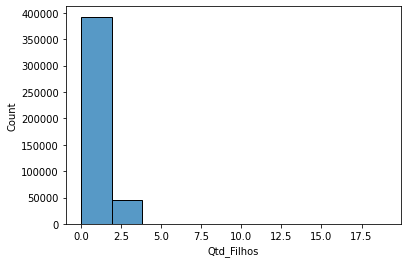

In [22]:
sb.histplot(data=df_clientes_cadastrados_ID_unicos, x='Qtd_Filhos', bins = 10)

In [85]:
df_clientes_cadastrados_ID_unicos['Tamanho_Familia'].value_counts()

2.0     233846
1.0      84471
3.0      77112
4.0      37345
5.0       5080
6.0        459
7.0        124
9.0          9
11.0         5
14.0         4
8.0          4
15.0         3
20.0         1
Name: Tamanho_Familia, dtype: int64

In [97]:
df_clientes_revistos = df_clientes_cadastrados_ID_unicos.drop(['Genero','Tem_Celular'], axis=1)
categoricas = categoricas - {'Genero','Tem_Celular'}
df_clientes_revistos['Anos_empregado'].replace(-1000.7,-1, inplace=True)

In [100]:
descricao_numericos = df_clientes_revistos[quantitativas].describe().T
print('coluna com valor min abaixo da média menos 2 desvio padrão:\n',
      descricao_numericos[descricao_numericos['min']<(descricao_numericos['mean']-2*descricao_numericos['std'])][['min','mean','std','max']])
print('\ncoluna com valor max acima da média mais 2 desvio padrão:\n',
      descricao_numericos[descricao_numericos['max']<(descricao_numericos['mean']+2*descricao_numericos['std'])][['max','mean','std','min']])

coluna com valor min abaixo da média menos 2 desvio padrão:
 Empty DataFrame
Columns: [min, mean, std, max]
Index: []

coluna com valor max acima da média mais 2 desvio padrão:
 Empty DataFrame
Columns: [max, mean, std, min]
Index: []


In [130]:
corr = df_clientes_revistos.corr().abs()
diagonal_superior = np.triu(np.ones(corr.shape), k=1).astype(np.bool)
corr = corr*diagonal_superior
colunas = []
valor = .95
while colunas == []:
  colunas = [coluna for coluna in corr.columns if any(corr[coluna] > valor)]
  if colunas == []: valor -= 0.05
corr[corr[colunas]>valor][colunas].sort_values(by=colunas)

,Tamanho_Familia
Qtd_Filhos,0.884778
ID_Cliente,NaN
Tem_Carro,NaN
Tem_Casa_Propria,NaN
Rendimento_Anual,NaN
Idade,NaN
Tem_telefone_trabalho,NaN
Tem_telefone_fixo,NaN
Tem_email,NaN
Tamanho_Familia,NaN


In [127]:
corr = df_clientes_revistos[set(df_clientes_revistos.columns)-{'Qtd_Filhos'}].corr().abs()
colunas = []
valor = .95
while colunas == []:
  corr = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
  colunas = [coluna for coluna in corr.columns if any(corr[coluna] > valor)]
  if colunas == []: valor -= 0.05
corr[corr[colunas]>valor][colunas].sort_values(by=colunas)

,Idade
Tamanho_Familia,0.306181
Rendimento_Anual,NaN
Tem_Carro,NaN
Tem_telefone_fixo,NaN
Tem_Casa_Propria,NaN
Tem_telefone_trabalho,NaN
Anos_empregado,NaN
ID_Cliente,NaN
Tem_email,NaN
Idade,NaN
